<a href="https://colab.research.google.com/github/Rehima1/-Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load Dataset

In [ ]:
data = pd.read_csv("heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Visualization

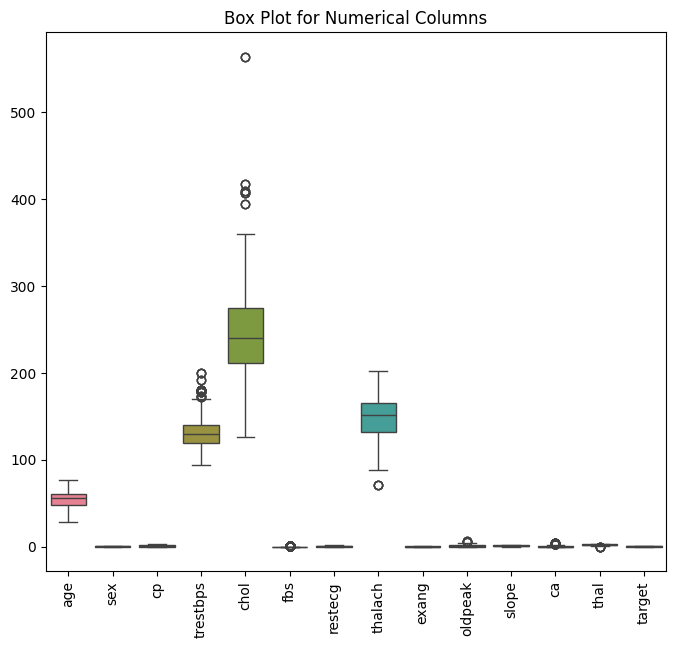

In [ ]:
# handle outliers

plt.figure(figsize=(8, 7))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=90)
plt.title('Box Plot for Numerical Columns')
plt.show()

In [ ]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

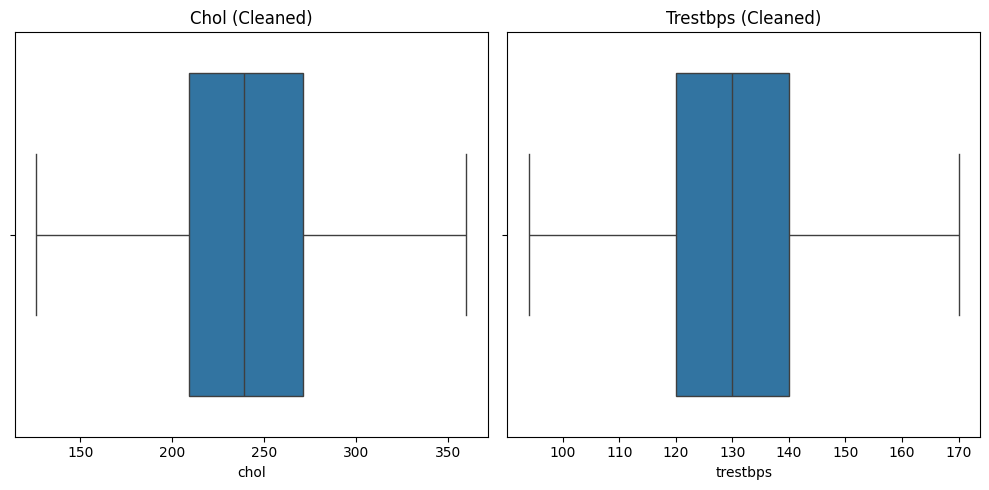

In [ ]:
# Remove outliers in chol and trestbps
data_cleaned = remove_outliers(data, 'chol')
data_cleaned = remove_outliers(data_cleaned, 'trestbps')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data_cleaned, x='chol')
plt.title('Chol (Cleaned)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned, x='trestbps')
plt.title('Trestbps (Cleaned)')

plt.tight_layout()
plt.show()

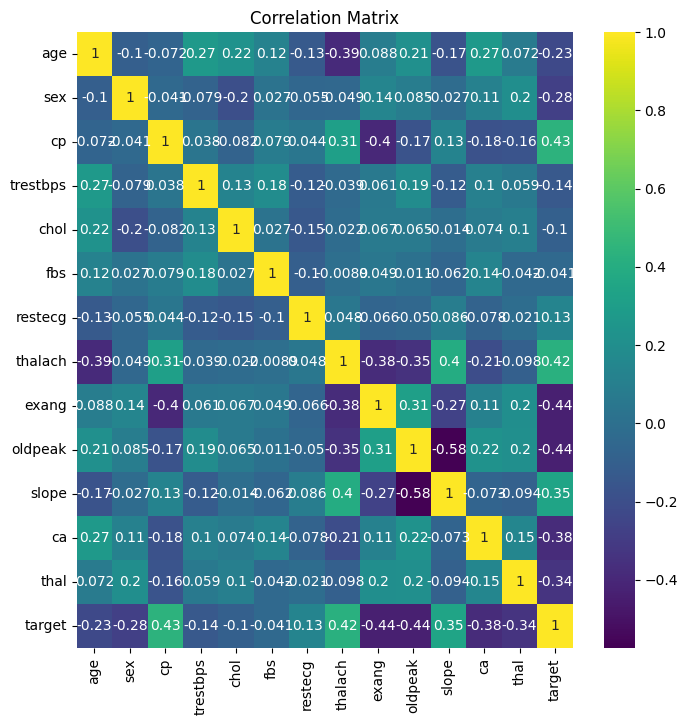

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(8, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

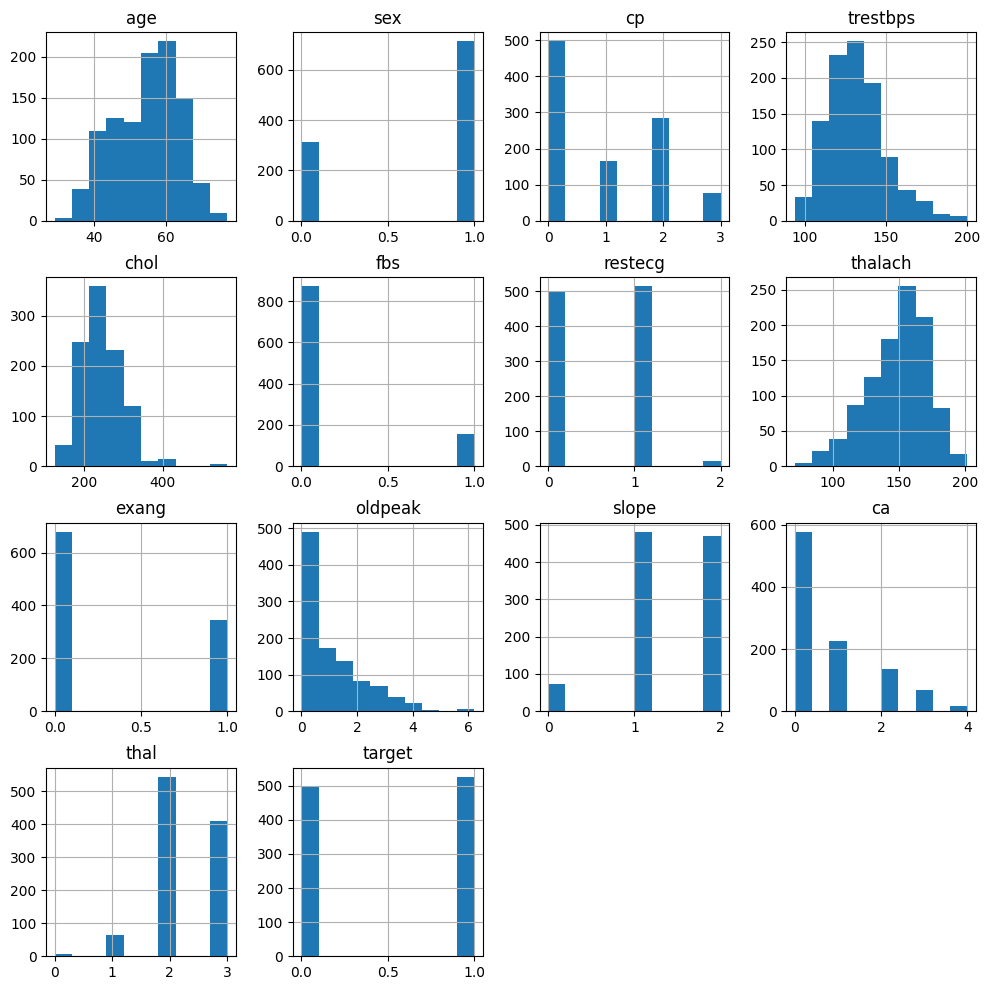

In [ ]:
data.hist(figsize=(12,12))
plt.savefig('featuresplot')

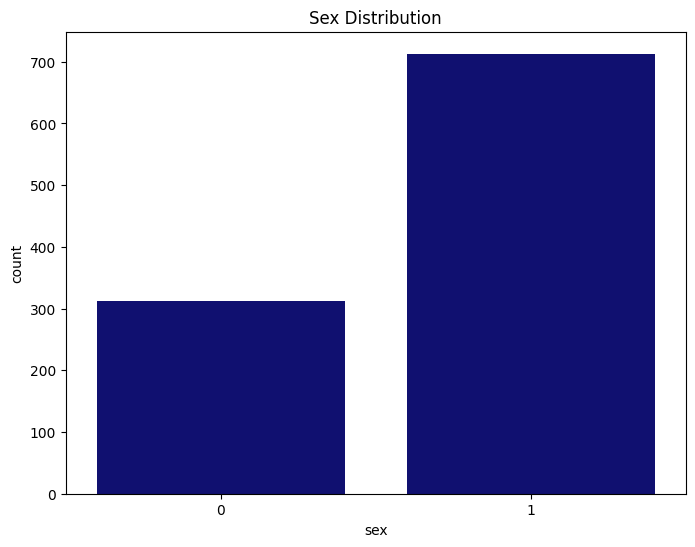

In [ ]:
# I in order to understand the data i will visualize each column for an ease of understading
# 1.sex
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=data, color = 'Navy')
plt.title('Sex Distribution')
plt.show()

In [ ]:
data['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

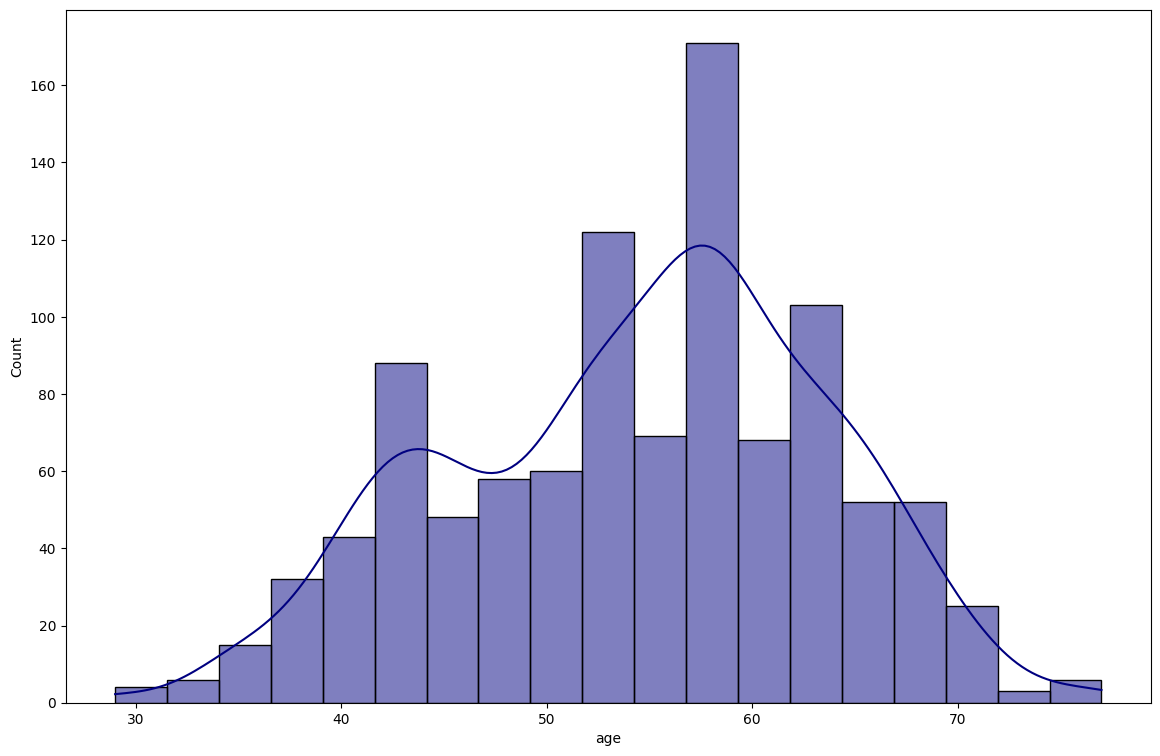

In [ ]:
#age
plt.figure(figsize=(14, 9))
sns.histplot(data["age"], kde=True, color="Navy")
plt.show()

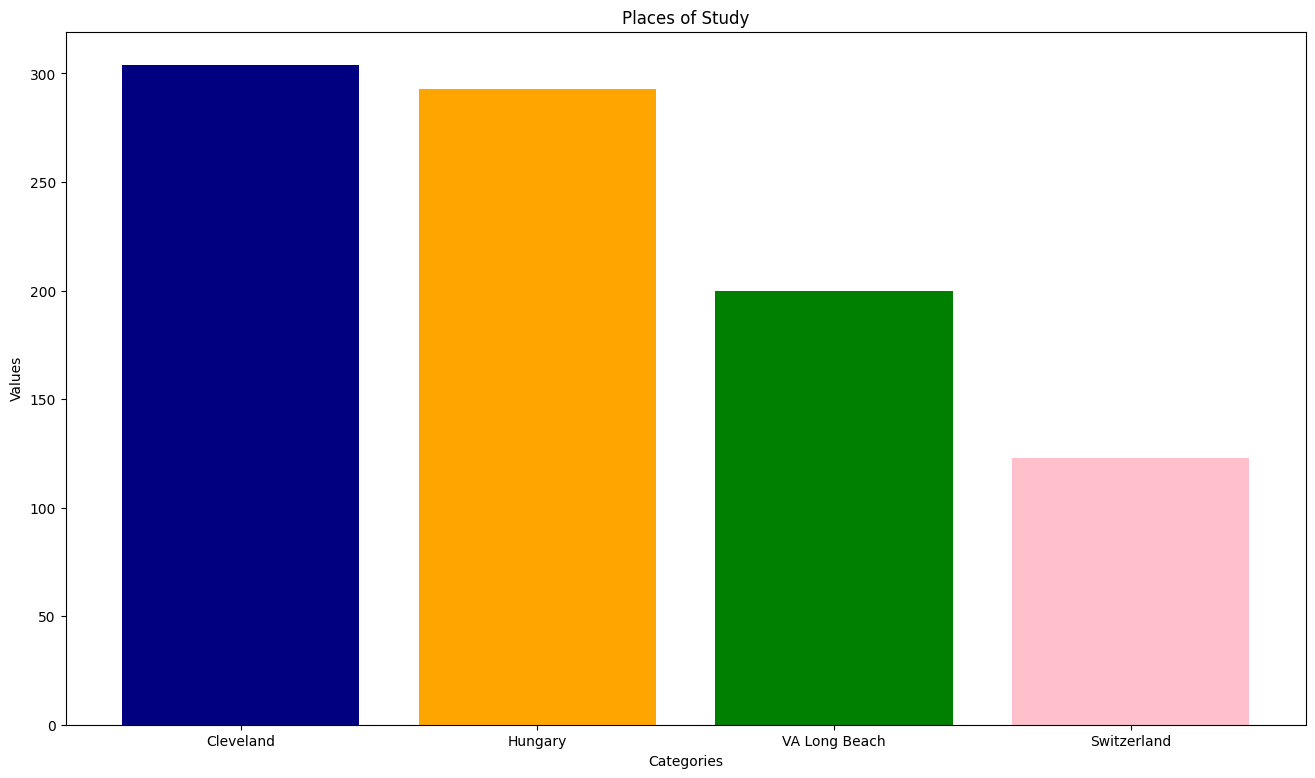

In [ ]:
categories = ['Cleveland', 'Hungary', 'VA Long Beach', 'Switzerland']
values = [304, 293, 200, 123]
colors = ['navy', 'orange', 'green', 'pink']

# Create a bar plot
plt.figure(figsize=(16, 9))
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Places of Study')

# Show plot
plt.show()

In [ ]:
#age base on cp
fig= px.histogram(data_frame=data,x="age",color="cp")
fig.show()

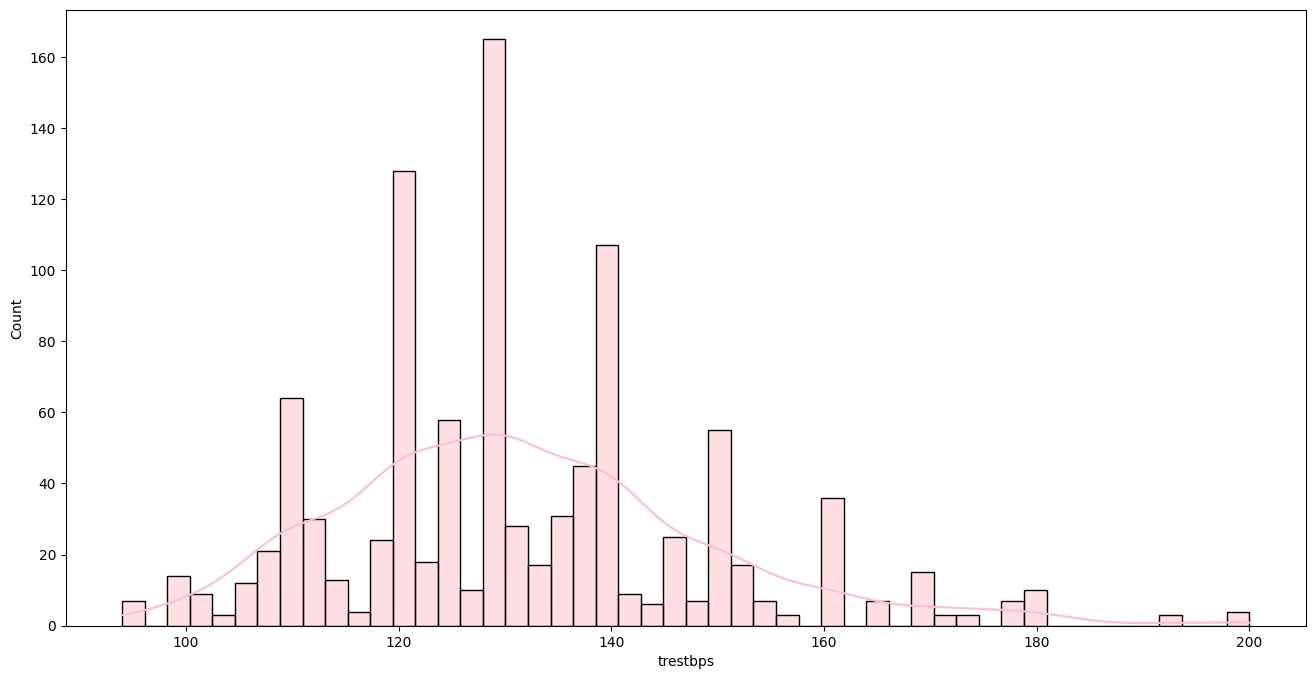

In [ ]:
#trestbps
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x="trestbps", kde=True, bins=50, color='pink')

plt.show()

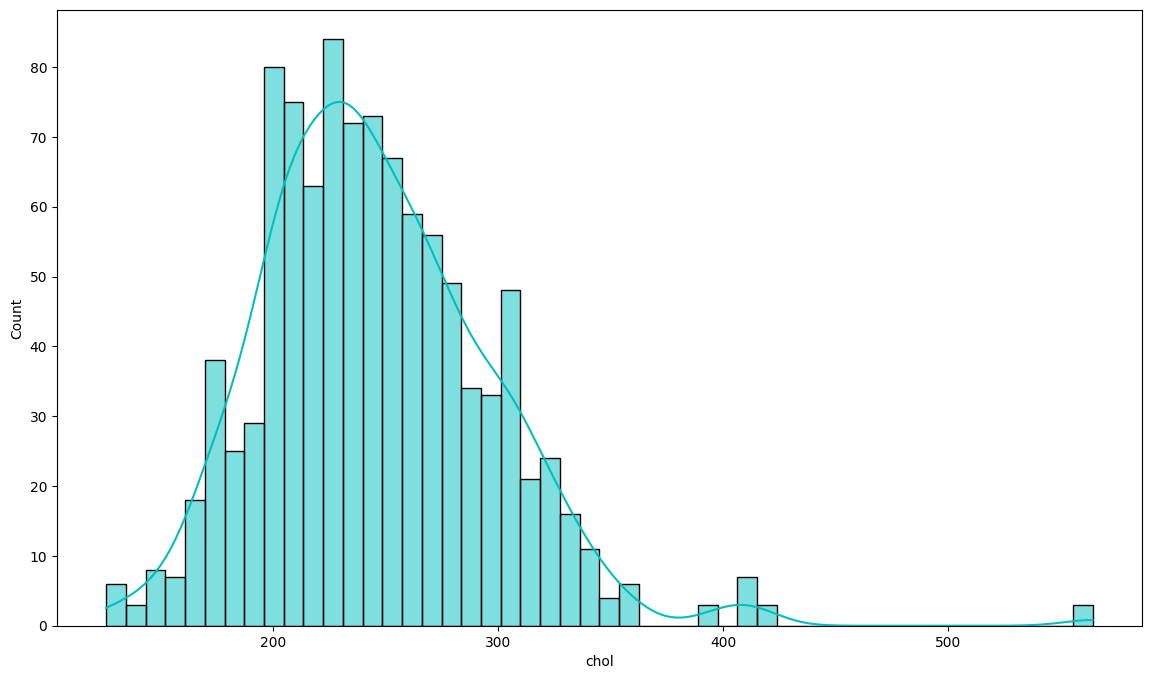

In [ ]:
#chol

plt.figure(figsize=(14, 8))

# Create a histplot of the chol column with a KDE overlay
sns.histplot(data=data, x="chol", kde=True, bins=50, color='c')

# Display the plot
plt.show()

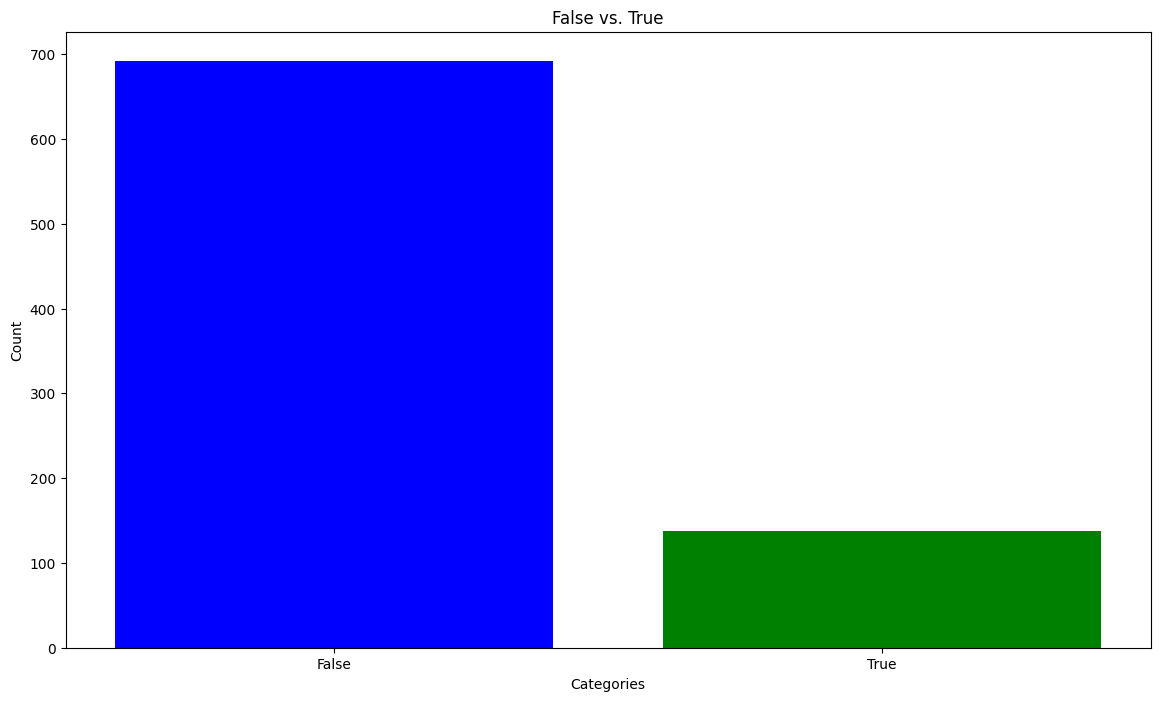

In [ ]:
#fbs
categories = ['False', 'True']
counts = [692, 138]

plt.figure(figsize=(14, 8))  # Set the plot size
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('False vs. True')
plt.show()

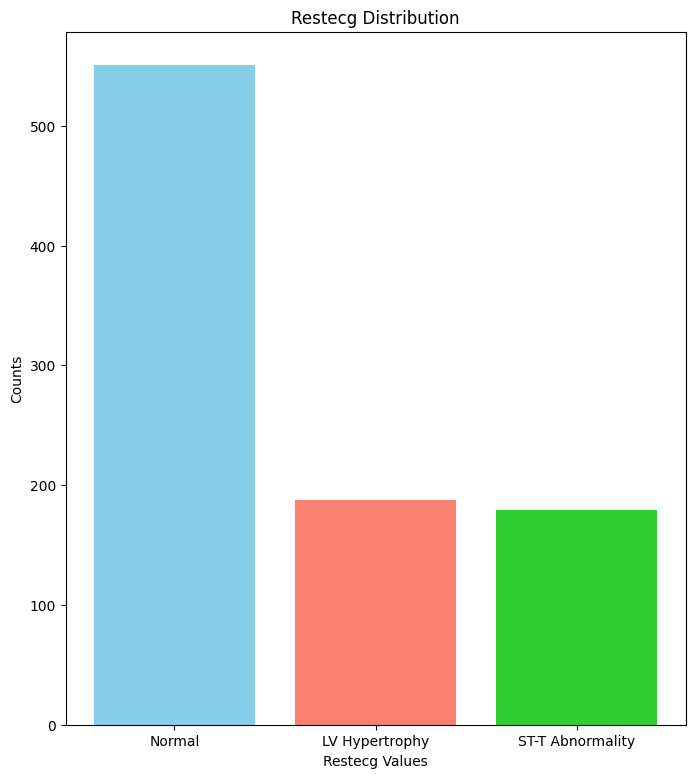

In [ ]:
#Restecg
values = ["Normal", "LV Hypertrophy", "ST-T Abnormality"]
counts = [551, 188, 179]


colors = ["skyblue", "salmon", "limegreen"]

plt.figure(figsize=(8, 9))
plt.bar(values, counts, color=colors)
plt.xlabel("Restecg Values")
plt.ylabel("Counts")
plt.title("Restecg Distribution")
plt.show()

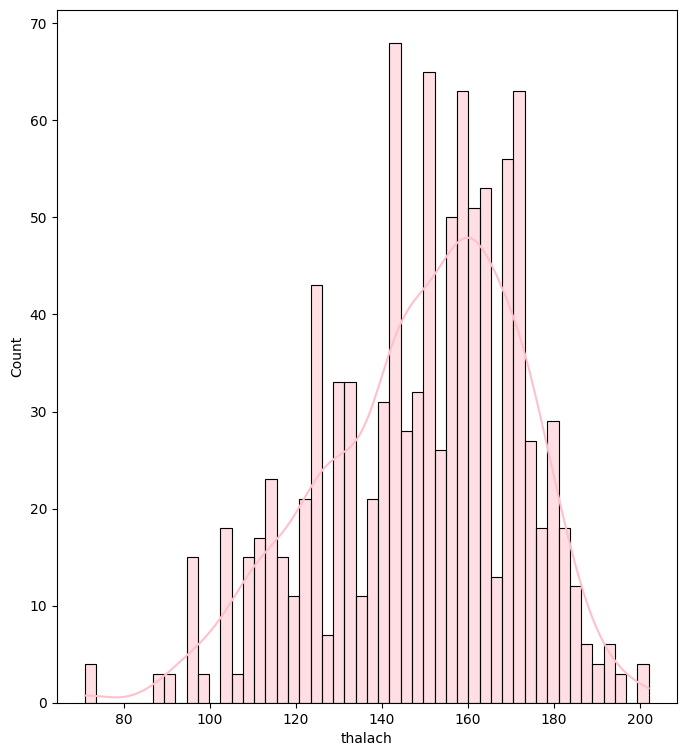

In [ ]:
#thalch

plt.figure(figsize=(8, 9))
sns.histplot(data=data, x="thalach", kde=True, bins=50, color='pink')
plt.show()

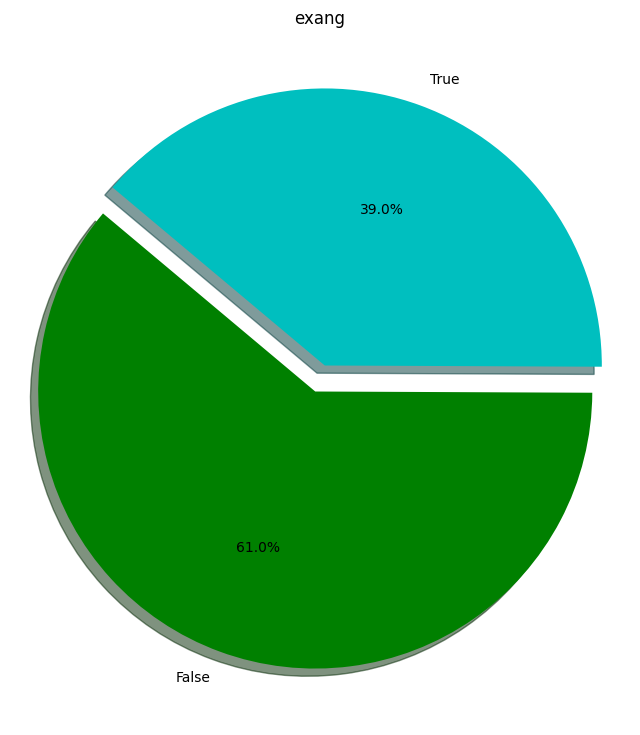

In [ ]:
# exang
labels = ['False', 'True']
sizes = [528, 337]
colors = ['g', 'c']
explode = (0, 0.1)
plt.figure(figsize=(8, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('exang')
plt.show()

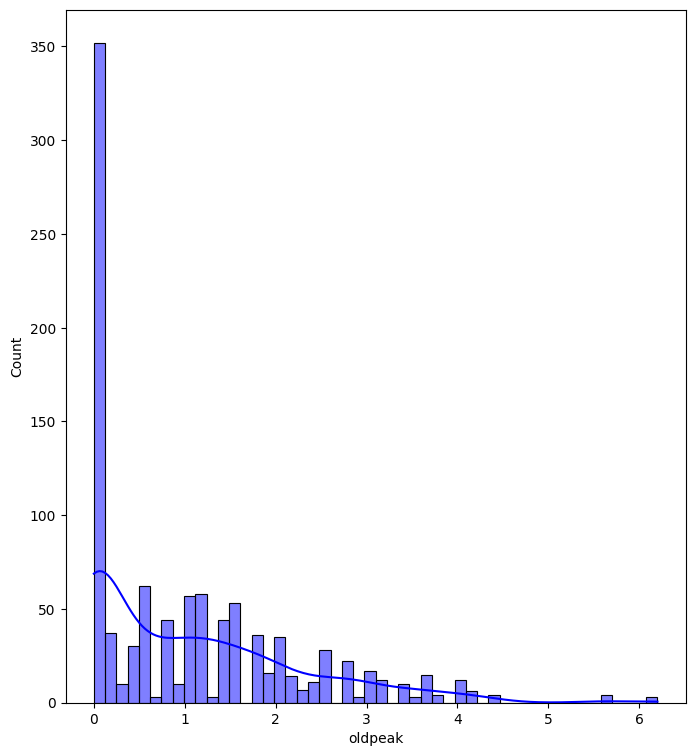

In [ ]:
#oldpeak

plt.figure(figsize=(8, 9))

sns.histplot(data=data, x="oldpeak", kde=True, bins=50, color='b')

plt.show()

In [ ]:
#slope
import plotly.graph_objs as go
slope_data = {
    "flat": 345,
    "upsloping": 203,
    "downsloping": 63
}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(slope_data.keys()), y=list(slope_data.values()), mode='lines+markers', name='Slope'))
fig.update_layout(
    title="Slope of the Peak Exercise ST Segment",
    xaxis_title="Slope Type",
    yaxis_title="Count",
    showlegend=True
)
fig.show()

<ipython-input-26-551b0a3af7c7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




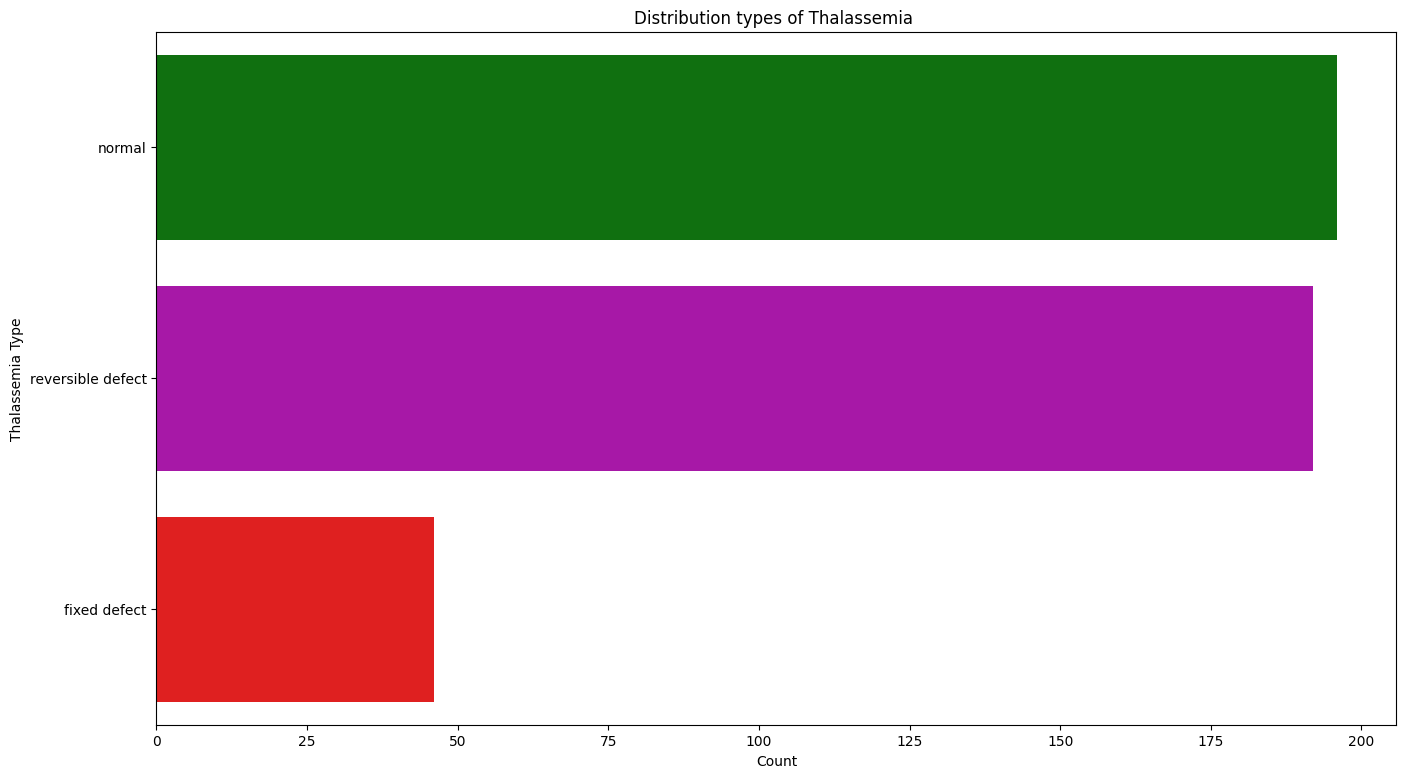

In [ ]:
#Thalassemia
thal_values = ['normal'] * 196 + ['reversible defect'] * 192 + ['fixed defect'] * 46


plt.figure(figsize=(16, 9))
sns.countplot(y=thal_values, palette=['g', 'm', 'r'])
plt.xlabel('Count')
plt.ylabel('Thalassemia Type')
plt.title('Distribution types of Thalassemia ')
plt.show()

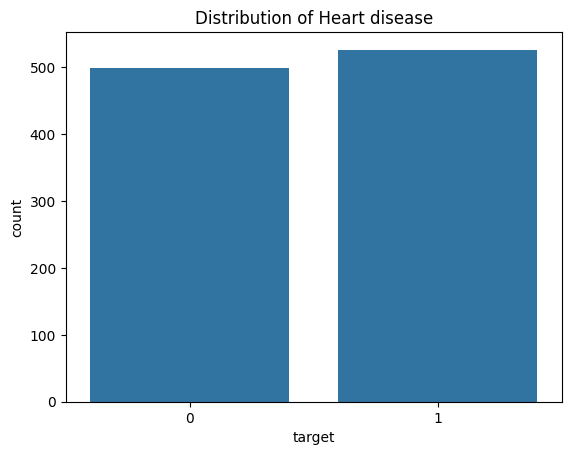

<Figure size 800x800 with 0 Axes>

In [ ]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart disease')
plt.figure(figsize=(8, 8))
plt.show()

# Model Building


In [ ]:
#based on the correlation that i did previously i will choose the most relevent featured to train my models

X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Supervised learning models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),


}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy: 2.2f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy:  0.80
Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Training Decision Tree...
Decision Tree Accuracy:  0.99
Confusion Matrix for Decision Tree:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Random Forest...
Random Forest Accuracy:  0.9

Training Logistic Regression...
Logistic Regression Accuracy:  0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Training Decision Tree...
Decision Tree Accuracy:  0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Random Forest...
Random Forest Accuracy:  0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      

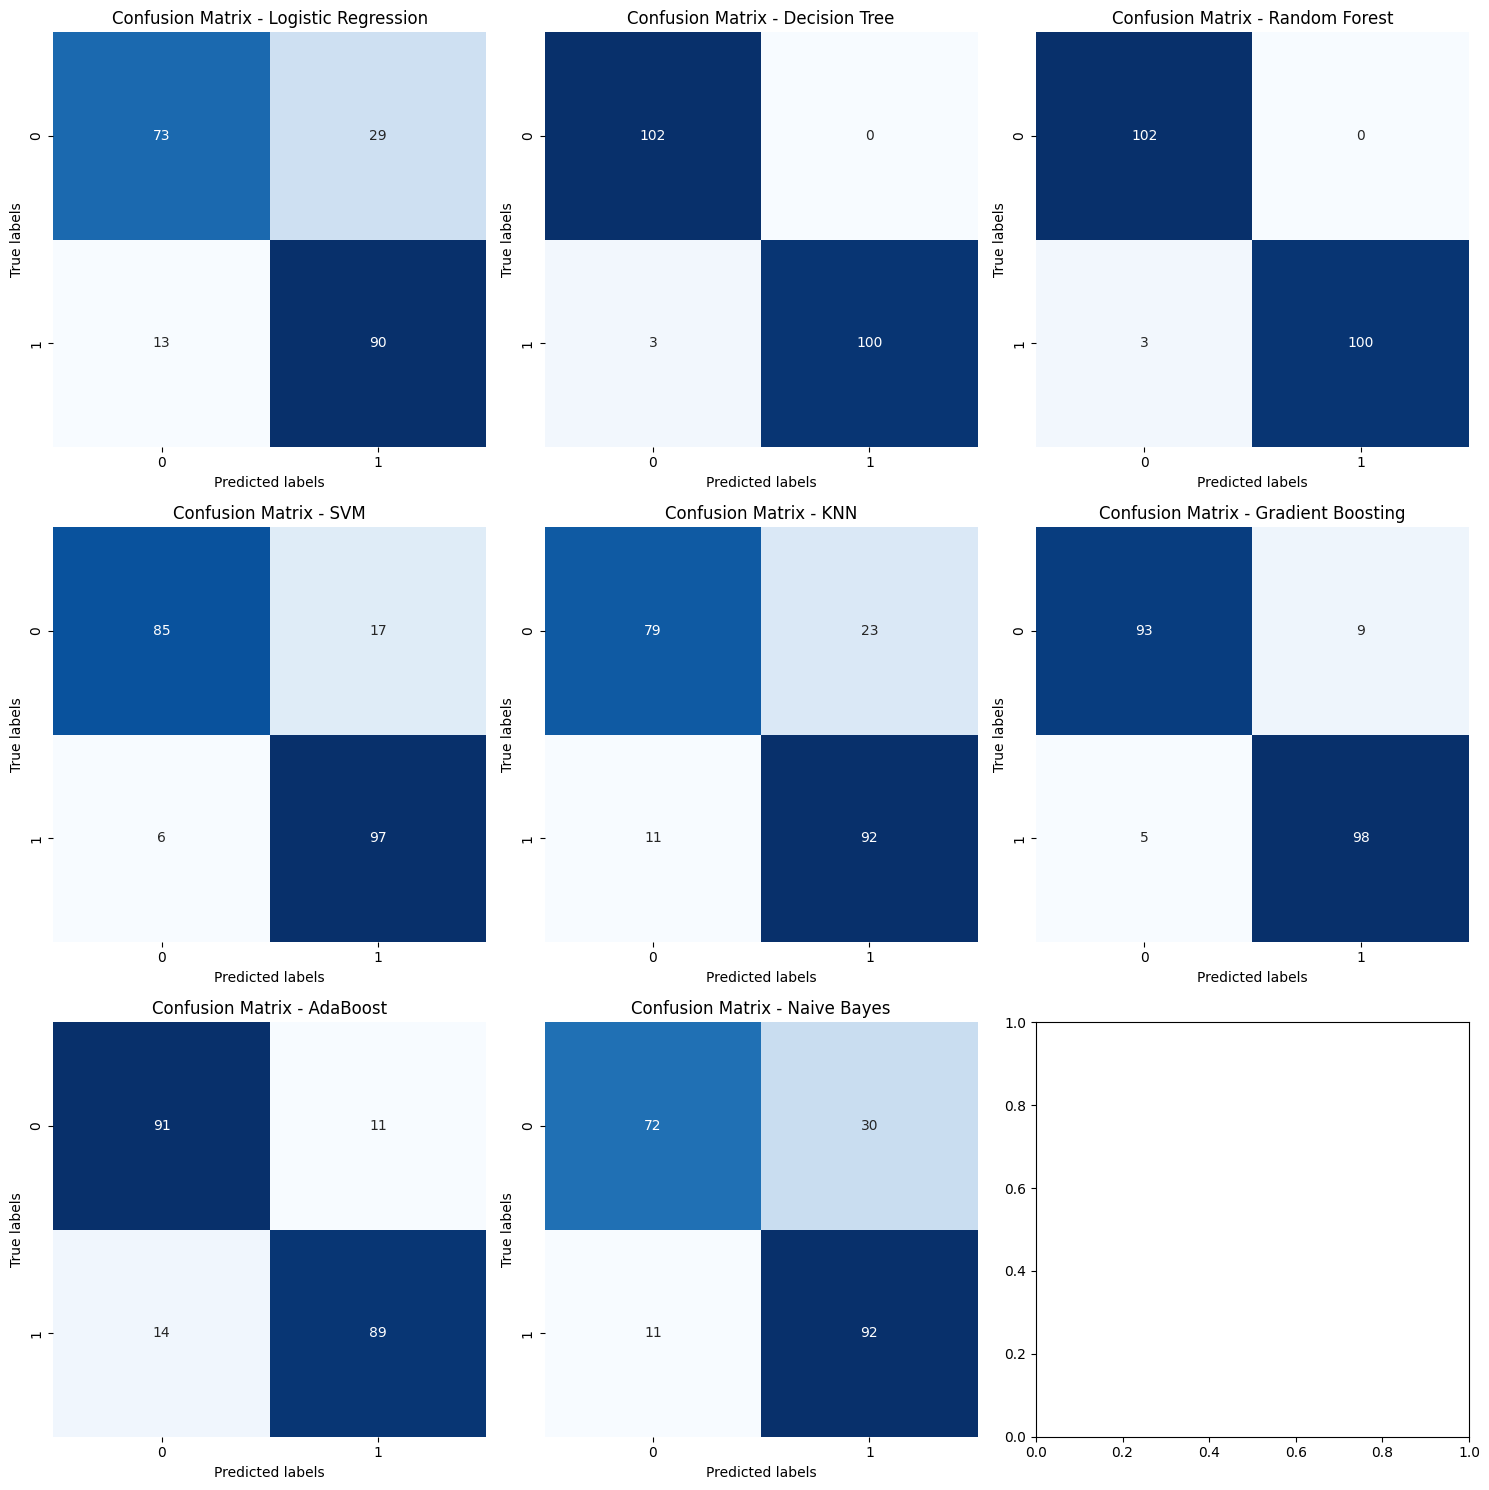

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(models) / 3)), ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy: 2.2f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_,
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

plt.tight_layout()
plt.show()

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.80
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
SVM Accuracy: 0.89
KNN Accuracy: 0.83
Gradient Boosting Accuracy: 0.93
AdaBoost Accuracy: 0.88
Naive Bayes Accuracy: 0.80


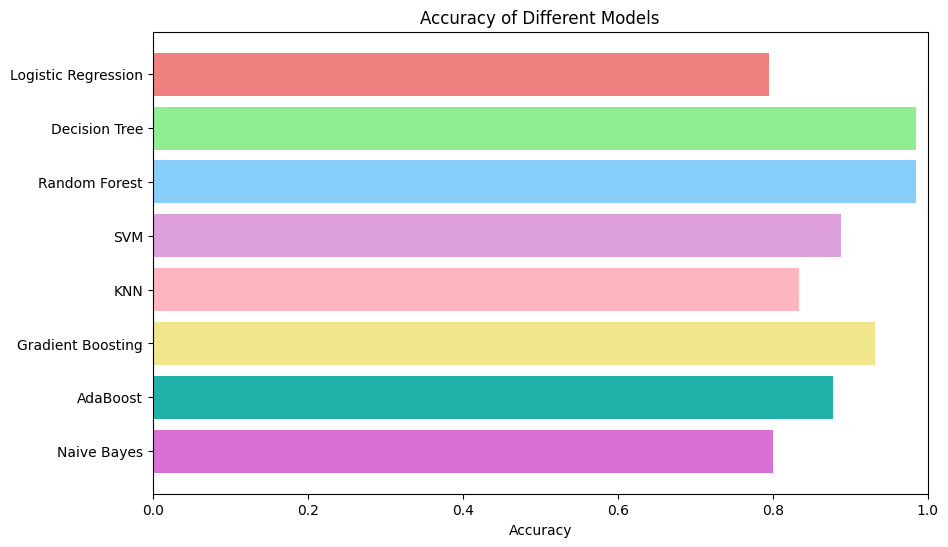

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy


colors = ['lightcoral', 'lightgreen', 'lightskyblue', 'plum', 'lightpink', 'khaki', 'lightseagreen', 'orchid']

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color=colors[:len(accuracies)])
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()